# Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

StatCite = pd.read_csv('StatCite.csv')

A_citation = np.loadtxt('CiteAdj.txt')

StatCite.head()

print(A_citation.shape)


(3248, 3248)


In [2]:
# Remove paper with no abstracts
keep_id = StatCite['abstracts'].map(lambda x: len(x.split())>=2)
drop_id = np.logical_not(keep_id)
print( "Remove "+str(sum(drop_id))+" papers with no abstract" )
StatCite = StatCite.loc[keep_id]
StatCite = StatCite.reset_index(drop=True)
print(StatCite.shape)


A_citation = A_citation[keep_id,:][:,keep_id]

print(A_citation.shape)


Remove 34 papers with no abstract
(3214, 9)
(3214, 3214)


# Load data

In [3]:
from patsy import dmatrix

# General helper functions
def b_basis(x, df=8):
    y = dmatrix("bs(x, df="+str(df)+", degree=3, include_intercept=False) - 1", {"x": x})
    return np.array(y)

# Data
N = np.loadtxt('./N_processed.txt')

print('N shape:', N.shape)


# X
D, W = N.shape


X = b_basis(StatCite['paperYear'], df=4)
X = np.concatenate((np.ones([D,1]),X), axis=1)
# X = np.ones([D,1])
# X = np.array(X)

print('X shape:', X.shape)


# Y
temp_journal = list( StatCite['journal'] )
M = 4
Y = [ np.zeros([D,M]) ]
# Y must be binary in the current implementation
for d in range(D):
    if temp_journal[d] == 'AOS':
        Y[0][d,0] = 1
    if temp_journal[d] == 'JASA':
        Y[0][d,1] = 1
    if temp_journal[d] == 'Biomet':
        Y[0][d,2] = 1
    if temp_journal[d] == 'RSS':
        Y[0][d,3] = 1

print('Y[0] shape:', Y[0].shape)

print('A shape:', A_citation.shape)


N shape: (3214, 990)
X shape: (3214, 5)
Y[0] shape: (3214, 4)
A shape: (3214, 3214)


In [4]:
word_list = np.loadtxt('./vocab.txt', dtype='str')
word_list = list(word_list)


In [5]:
from Our_Model import Model

D = 3214
W = 990
K = 10
P = 5
L = 1
Iteration 1


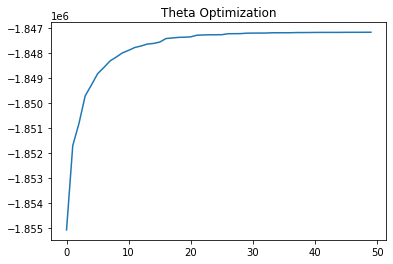

Range of Hessian_Mu: (-11.76209017902918, -0.6230557016272247)
Batch: 1
Batch: 2
Batch: 3
Iteration 2


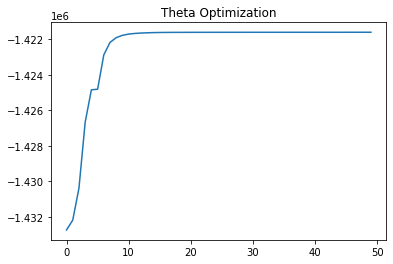

Range of Hessian_Mu: (-14.884355664768938, -0.5852733054107495)
Batch: 1
Batch: 2
Batch: 3
Iteration 3


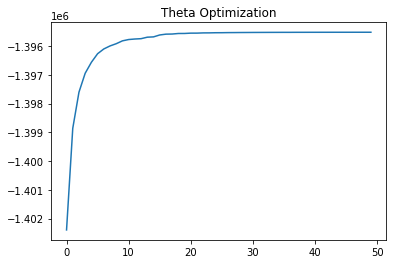

Range of Hessian_Mu: (-20.06226474777688, -0.6400877059742173)
Batch: 1
Batch: 2
Batch: 3
Iteration 4


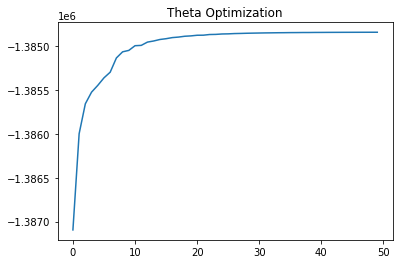

Range of Hessian_Mu: (-22.214672012517205, -0.4969876521864939)
Batch: 1
Batch: 2
Batch: 3
Iteration 5


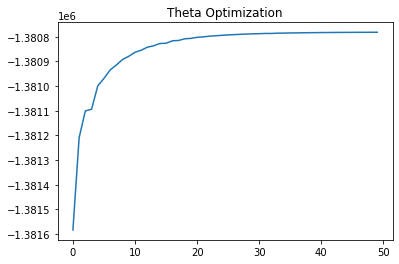

Range of Hessian_Mu: (-22.496118045813304, -0.42868560326965777)
Batch: 1
Batch: 2
Batch: 3
Iteration 6


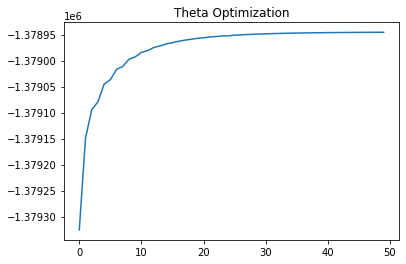

Range of Hessian_Mu: (-23.920878658995363, -0.43161361815302846)
Batch: 1
Batch: 2
Batch: 3
Iteration 7


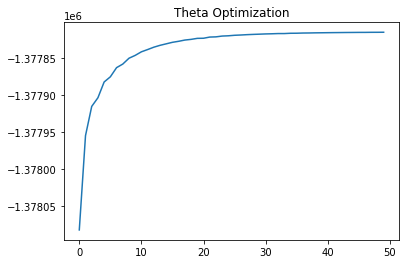

Range of Hessian_Mu: (-24.996543080489605, -0.4089333644739338)
Batch: 1
Batch: 2
Batch: 3
Iteration 8


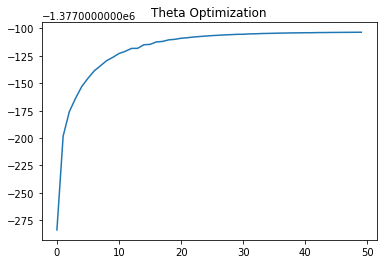

Range of Hessian_Mu: (-25.722618896207482, -0.4076388726501509)
Batch: 1
Batch: 2
Batch: 3
Iteration 9


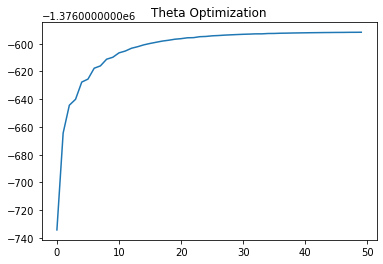

Range of Hessian_Mu: (-26.15568985938951, -0.3886011209511869)
Batch: 1
Batch: 2
Batch: 3
Iteration 10


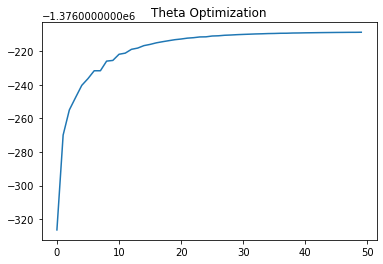

Range of Hessian_Mu: (-26.375449289500917, -0.34626879544018846)
Batch: 1
Batch: 2
Batch: 3
Iteration 11


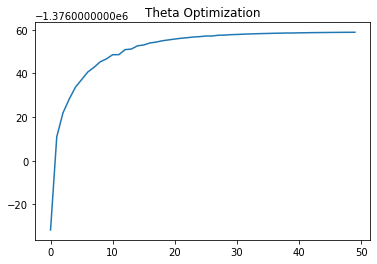

Range of Hessian_Mu: (-26.4480899815472, -0.33606245054563477)
Batch: 1
Batch: 2
Batch: 3
Iteration 12


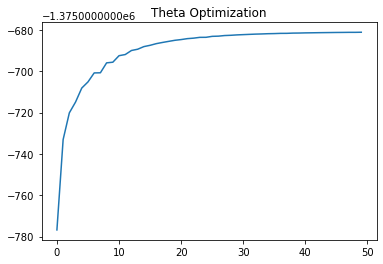

Range of Hessian_Mu: (-26.588507236404542, -0.3224124074938329)
Batch: 1
Batch: 2
Batch: 3
Iteration 13


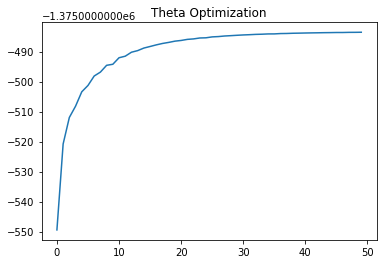

Range of Hessian_Mu: (-26.64980058696802, -0.29355599862044324)
Batch: 1
Batch: 2
Batch: 3
Iteration 14


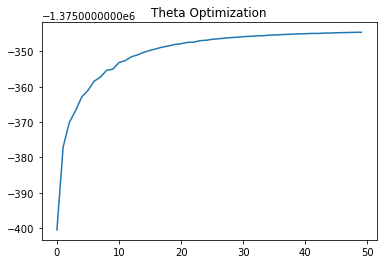

Range of Hessian_Mu: (-26.71235138348668, -0.2980623982547202)
Batch: 1
Batch: 2
Batch: 3
Iteration 15


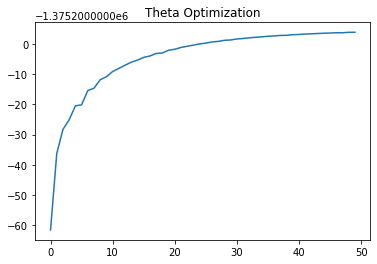

Range of Hessian_Mu: (-26.837975059902877, -0.2744837292675365)
Batch: 1
Batch: 2
Batch: 3
Iteration 16


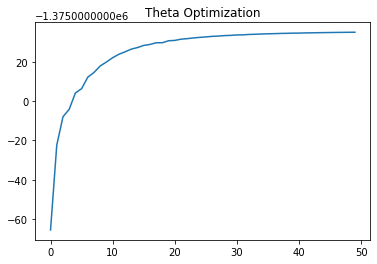

Range of Hessian_Mu: (-26.995871721814915, -0.2852899058668662)
Batch: 1
Batch: 2
Batch: 3
Iteration 17


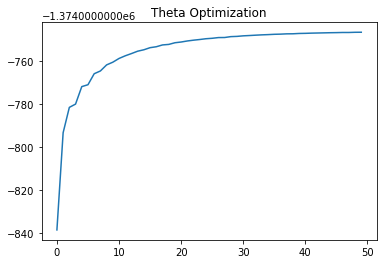

Range of Hessian_Mu: (-27.141109461945174, -0.3026363807409433)
Batch: 1
Batch: 2
Batch: 3
Iteration 18


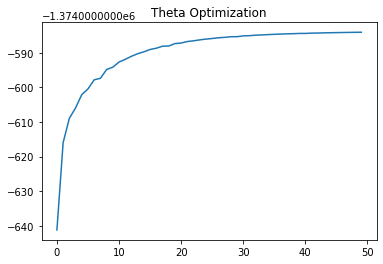

Range of Hessian_Mu: (-27.316654507671725, -0.30166669309769806)
Batch: 1
Batch: 2
Batch: 3
Iteration 19


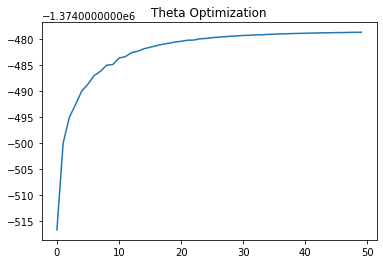

Range of Hessian_Mu: (-27.32202598188846, -0.30481878755729264)
Batch: 1
Batch: 2
Batch: 3
Iteration 20


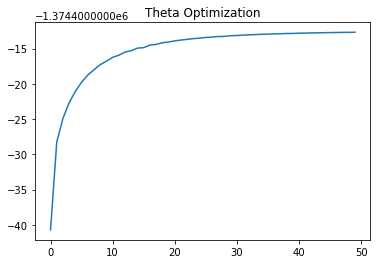

Range of Hessian_Mu: (-27.428954571344978, -0.29494638967198966)
Batch: 1
Batch: 2
Batch: 3
CPU times: user 1h 7min 15s, sys: 2min 14s, total: 1h 9min 29s
Wall time: 25min 8s


In [6]:
%%time

m = Model()
m.fit(N, K=10, A=A_citation, X=X, Y=Y, n_iter=20, tol=1e-5)


[1. 0. 0. 0. 0.]
[1.         0.50482253 0.07021605 0.00308642 0.        ]
[1.         0.62191358 0.22839506 0.02469136 0.        ]
[1.         0.50520833 0.39583333 0.08333333 0.        ]
[1.         0.30864198 0.49382716 0.19753086 0.        ]
[1.         0.15802469 0.46617284 0.36780247 0.008     ]
[1.         0.06666667 0.34666667 0.52266667 0.064     ]
[1.         0.01975309 0.19160494 0.57264198 0.216     ]
[1.         0.00246914 0.05728395 0.42824691 0.512     ]
[1. 0. 0. 0. 1.]


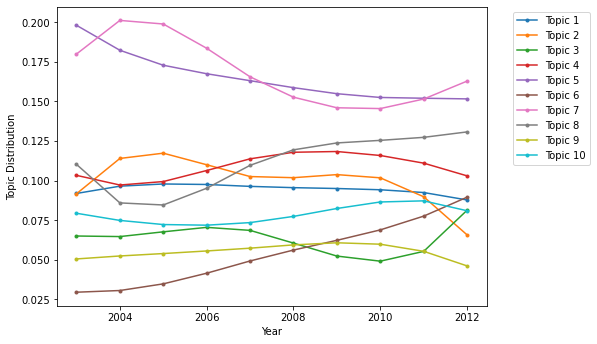

In [7]:
unique_years = range(np.min( StatCite['paperYear'] ), np.max(StatCite['paperYear'])+1)
X_unique_year = np.zeros([len(unique_years),5])

for i in range(len(unique_years)):
    X_unique_year[i,:] = np.mean( X[StatCite['paperYear']==unique_years[i],:], 0)
    print(X_unique_year[i,:])

a_feature = m.row_logit( X_unique_year @ m.Beta )


f = plt.figure(figsize=(7*1.1,5*1.1))
for i in range(a_feature.shape[1]):
    plt.plot(unique_years, a_feature[:,i], '.-')

topic_labels = ['Topic '+str(i+1) for i in range(m.Beta.shape[1])]
plt.legend(topic_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Topic Distribution')
plt.show()

#f.savefig('assortative.pdf', bbox_inches='tight')  



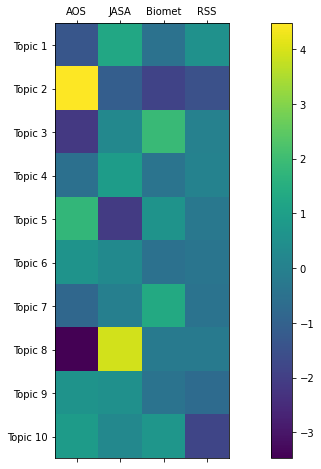

In [8]:

figure = plt.figure(figsize=(15,8))
axes = figure.add_subplot(111)

# using the matshow() function 
caxes = axes.matshow(m.Alpha[0])
figure.colorbar(caxes)

axes.set_xticks(range(4))
axes.set_yticks(range(10))

axes.set_xticklabels(['AOS','JASA','Biomet','RSS'])
axes.set_yticklabels(topic_labels)

plt.show()

#figure.savefig('generative.pdf', bbox_inches='tight')


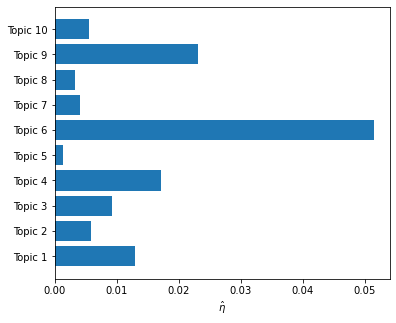

In [12]:
f = plt.figure(figsize=(6,5))
#plt.xticks(rotation=90)
#plt.bar(x=['Topic '+str(i+1) for i in range(10)], height=np.diag(Eta))
w_temp = list(np.diag(m.Eta))
plt.barh(y=topic_labels, width=w_temp)
plt.xlabel('$\hat{\eta}$')
f.savefig('Eta.pdf', bbox_inches='tight')
